In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5] # this is in 2d array ,we have to convert it  into 1d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
# Reload the dataset to ensure y_test is a numpy array
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Reshape y_test
y_test = y_test.reshape(-1,)
print("y_test reshaped successfully.")

y_test reshaped successfully.


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[int(y[index])])

/tmp/ipython-input-3076502705.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


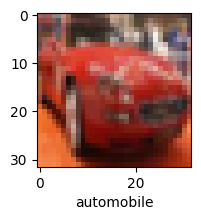

In [ ]:
plot_sample(X_train,y_train,5)

In [ ]:
# normalize from 0 to 1 ,divide by 255
X_train=X_train/255
X_test=X_test/255

In [ ]:
# here it is for ann model,(correction not ann but ann)
cnn=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.3043 - loss: 1.9352
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.4169 - loss: 1.6495
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 72ms/step - accuracy: 0.4557 - loss: 1.5525
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 73ms/step - accuracy: 0.4758 - loss: 1.4913
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.4965 - loss: 1.4309
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.5127 - loss: 1.3870
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 75ms/step - accuracy: 0.5245 - loss: 1.3542
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 73ms/step - accuracy: 0.5396 - loss: 1.3148
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 73ms/step - accuracy: 0.5472 - loss: 1.2899
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5574 - loss: 1.2505


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classifiation report:\n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
classifiation report:
               precision    recall  f1-score   support

           0       0.40      0.78      0.53      1000
           1       0.51      0.79      0.62      1000
           2       0.45      0.32      0.37      1000
           3       0.33      0.46      0.39      1000
           4       0.61      0.23      0.33      1000
           5       0.67      0.13      0.22      1000
           6       0.40      0.81      0.53      1000
           7       0.77      0.40      0.53      1000
           8       0.66      0.56      0.61      1000
           9       0.72      0.30      0.42      1000

    accuracy                           0.48     10000
   macro avg       0.55      0.48      0.45     10000
weighted avg       0.55      0.48      0.45     10000



<function matplotlib.pyplot.show(close=None, block=None)>

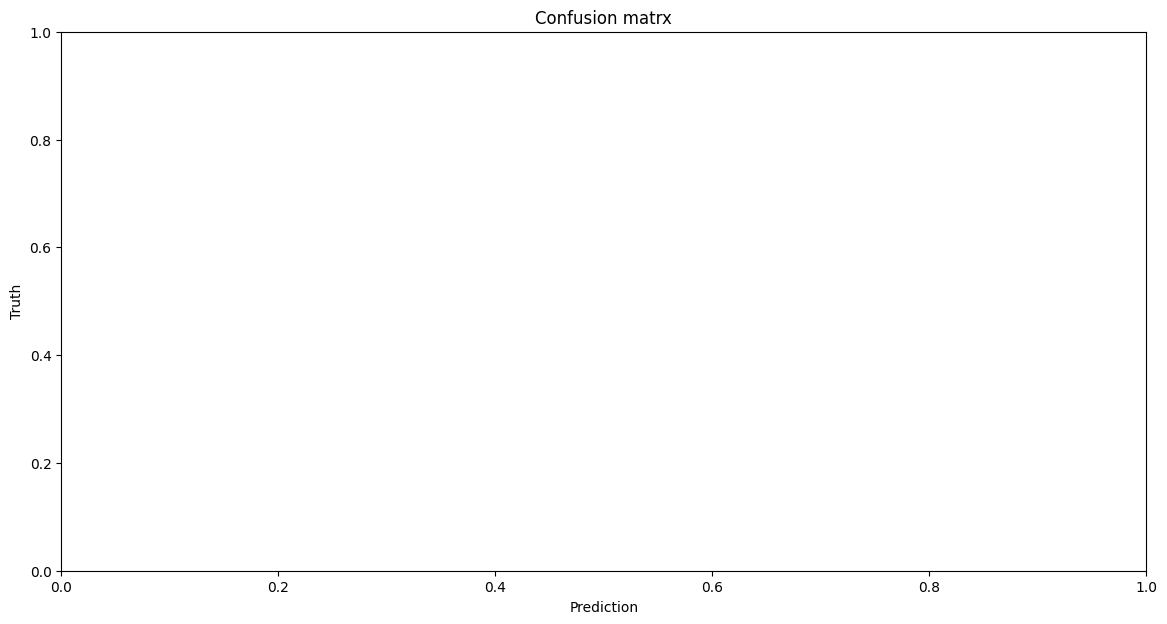

In [ ]:
import seaborn as sn
plt.figure(figsize=(14,7))
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrx')
plt.show

In [ ]:
cnn_real=models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn_real.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_real.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3778 - loss: 1.7129
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.5843 - loss: 1.1750
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6472 - loss: 1.0187
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.6743 - loss: 0.9279
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7073 - loss: 0.8411


In [ ]:
cnn_real.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6909 - loss: 0.8966


[0.9090479612350464, 0.6883999705314636]

In [ ]:
y_pred=cnn_real(X_test)
y_pred[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.5560932e-03, 3.5593822e-04, 6.7813550e-03, 7.9087090e-01,
        1.1927782e-03, 1.6439915e-01, 9.2365844e-03, 5.3806219e-04,
        1.8652640e-02, 1.4164855e-03],
       [2.0428631e-03, 4.9435098e-02, 2.3467876e-05, 1.0505222e-06,
        7.3999695e-06, 9.3708749e-08, 3.8667473e-08, 2.4799490e-06,
        9.4684660e-01, 1.6407814e-03],
       [1.5486288e-01, 7.5960614e-02, 1.1221742e-02, 7.2026565e-03,
        1.9820264e-02, 2.1052698e-03, 1.6208264e-04, 1.9893242e-02,
        6.9767946e-01, 1.1091809e-02],
       [8.6692423e-01, 2.9056301e-02, 1.8351678e-02, 4.0522849e-04,
        1.0464943e-02, 1.9282543e-05, 1.4648304e-03, 5.1404303e-04,
        7.2168648e-02, 6.3086289e-04],
       [6.5220229e-05, 1.9267878e-04, 3.5395410e-02, 1.3788577e-02,
        5.6450623e-01, 8.5975425e-03, 3.7726468e-01, 8.7351582e-05,
        6.5894819e-05, 3.6389949e-05]], dtype=float32)>

In [ ]:
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

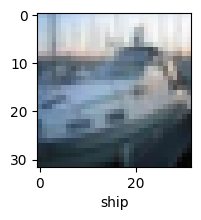

In [ ]:
plot_sample(X_test,y_test,2)

In [ ]:
# checking is it really the classification belong to same category or not
classes[y_pred_classes[2]]

'ship'